In [1]:
# Downloading Dataset
import kagglehub
import os

# Analysing and Visualizing Data Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics, tree
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Spliting Libraries
from sklearn.model_selection import train_test_split

# Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression

# Random Forest Libraries
from sklearn.ensemble import RandomForestClassifier

# Making Diffrent Models and downloading them
from google.colab import files
import joblib

#**Importing Datasets**

In [2]:
mragpavank_heart_diseaseuci_path = kagglehub.dataset_download('mragpavank/heart-diseaseuci')
print('Data source import complete.')
df = pd.read_csv(os.path.join(mragpavank_heart_diseaseuci_path, 'heart.csv'))

100%|██████████| 3.40k/3.40k [00:00<00:00, 7.86MB/s]

Extracting files...
Data source import complete.


#**Printing Head**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#**Printing info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#**Checking Nulls**

In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


#**Print Describtion**

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#**Print Unique Values**

In [7]:
print("the uniqe values of thal:\n")
df['thal'].unique()

the uniqe values of thal:



array([1, 2, 3, 0])

In [8]:
print("the uniqe values of the cp :\n")
df['cp'].unique()

the uniqe values of the cp :



array([3, 2, 1, 0])

#**Analyzing Important Features**

In [9]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [10]:
print(df.groupby('thal')['target'].value_counts(normalize=True))
print(df.groupby('cp')['target'].value_counts(normalize=True))

thal  target
0     0         0.500000
      1         0.500000
1     0         0.666667
      1         0.333333
2     1         0.783133
      0         0.216867
3     0         0.760684
      1         0.239316
Name: proportion, dtype: float64
cp  target
0   0         0.727273
    1         0.272727
1   1         0.820000
    0         0.180000
2   1         0.793103
    0         0.206897
3   1         0.695652
    0         0.304348
Name: proportion, dtype: float64


#**EDA**

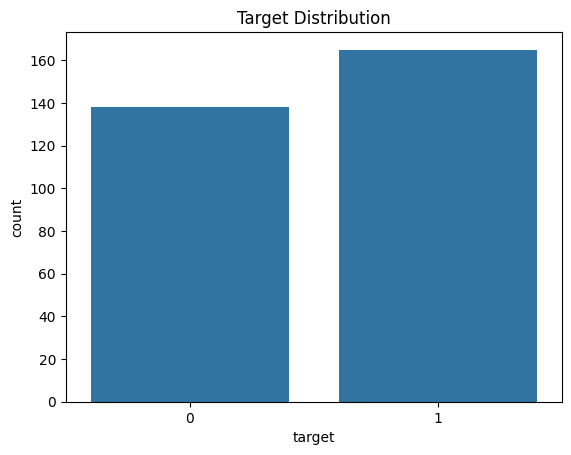

In [11]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution")
plt.show()

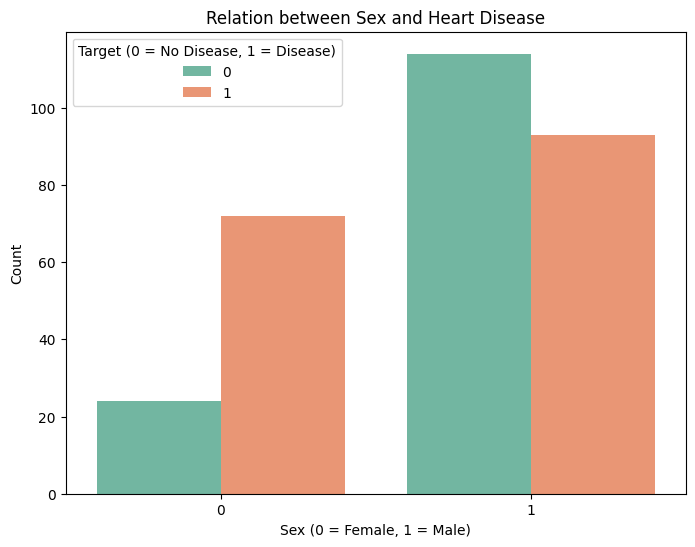

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='target', data=df, palette='Set2')
plt.title("Relation between Sex and Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Target (0 = No Disease, 1 = Disease)")
plt.show()

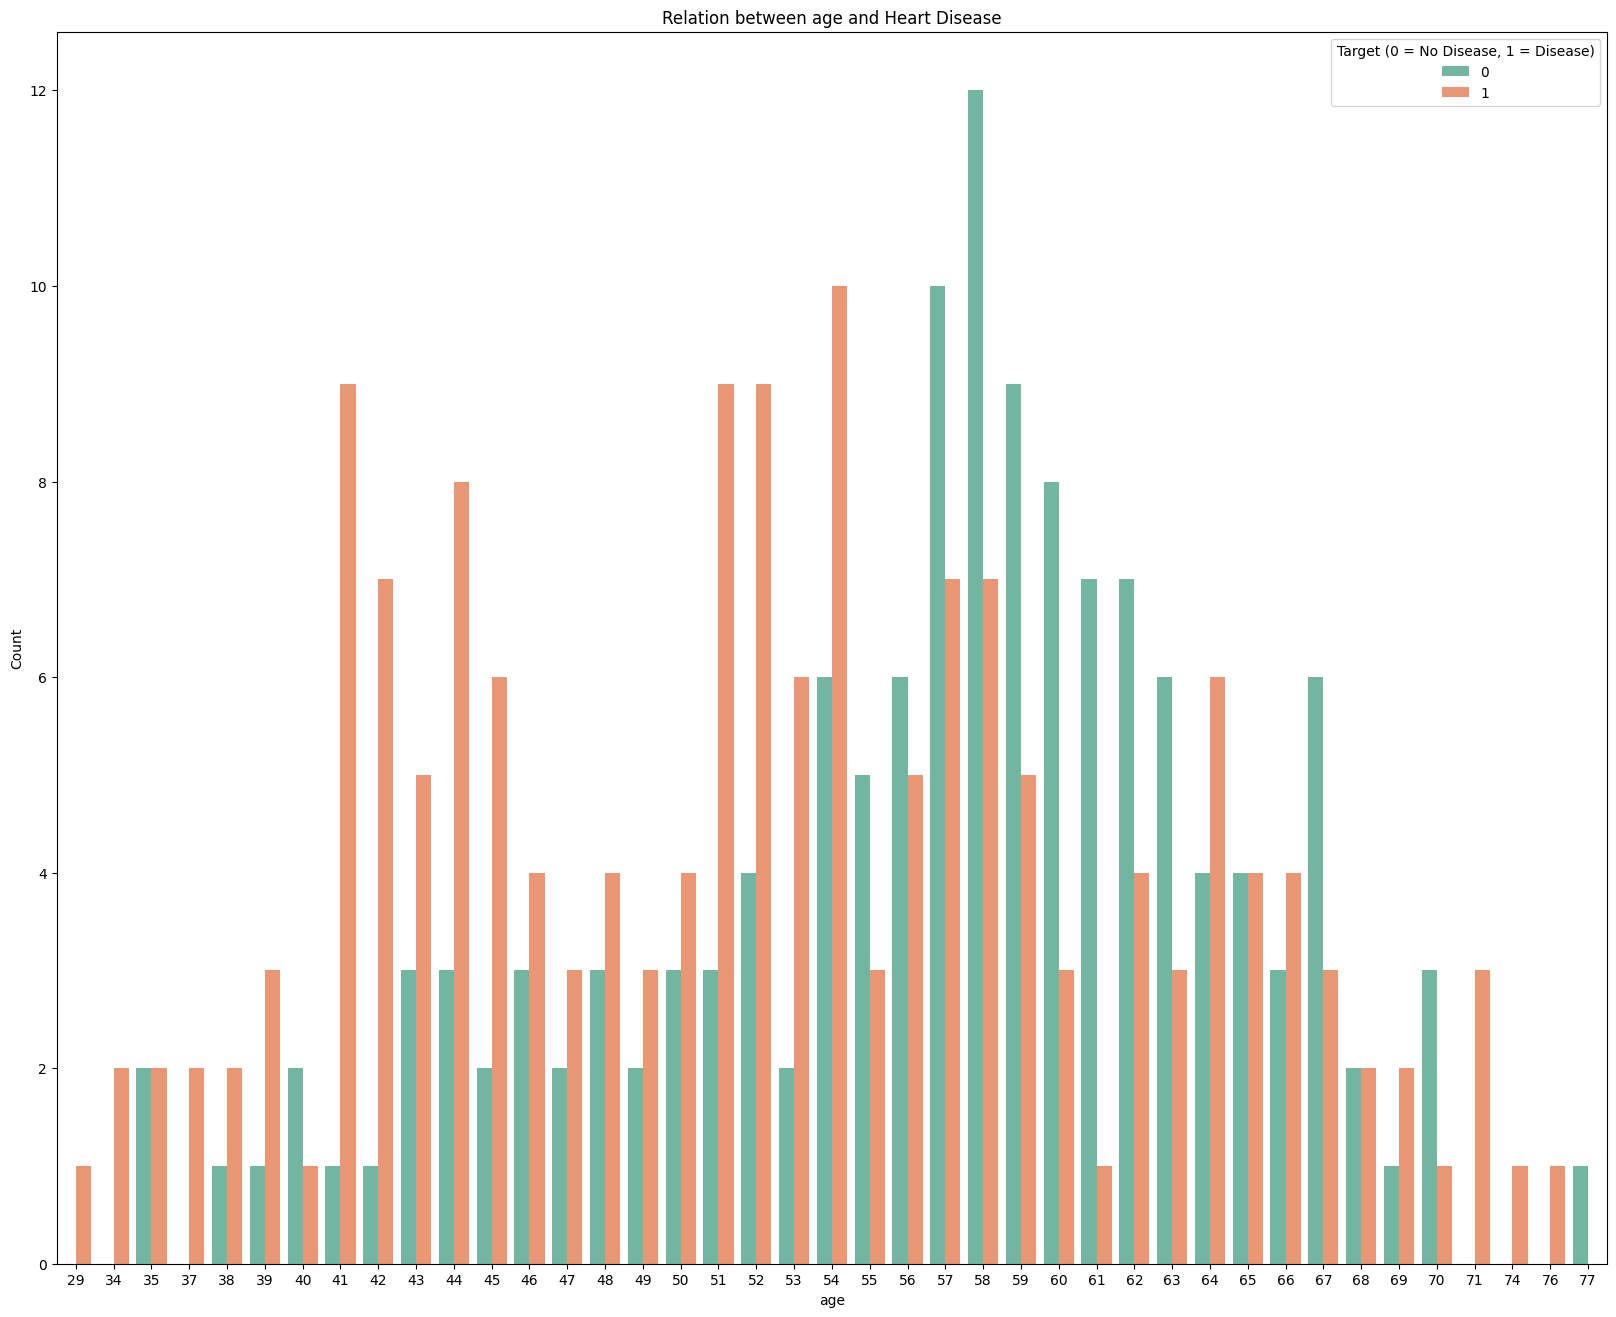

In [13]:
plt.figure(figsize=(20,16))
sns.countplot(x='age', hue='target', data=df, palette='Set2')
plt.title("Relation between age and Heart Disease")
plt.xlabel("age")
plt.ylabel("Count")
plt.legend(title="Target (0 = No Disease, 1 = Disease)")
plt.show()

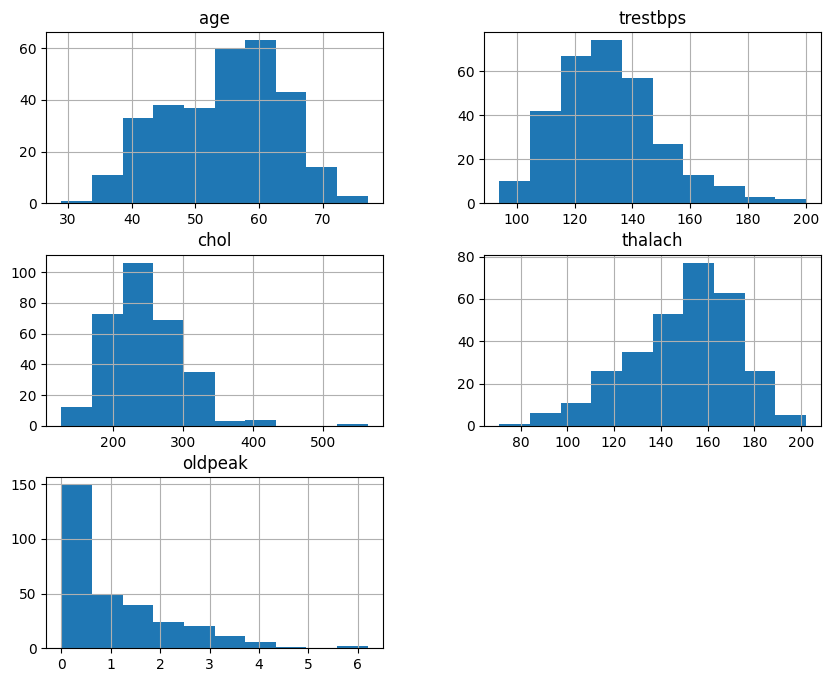

In [14]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']
df[num_cols].hist(figsize=(10,8))
plt.show()

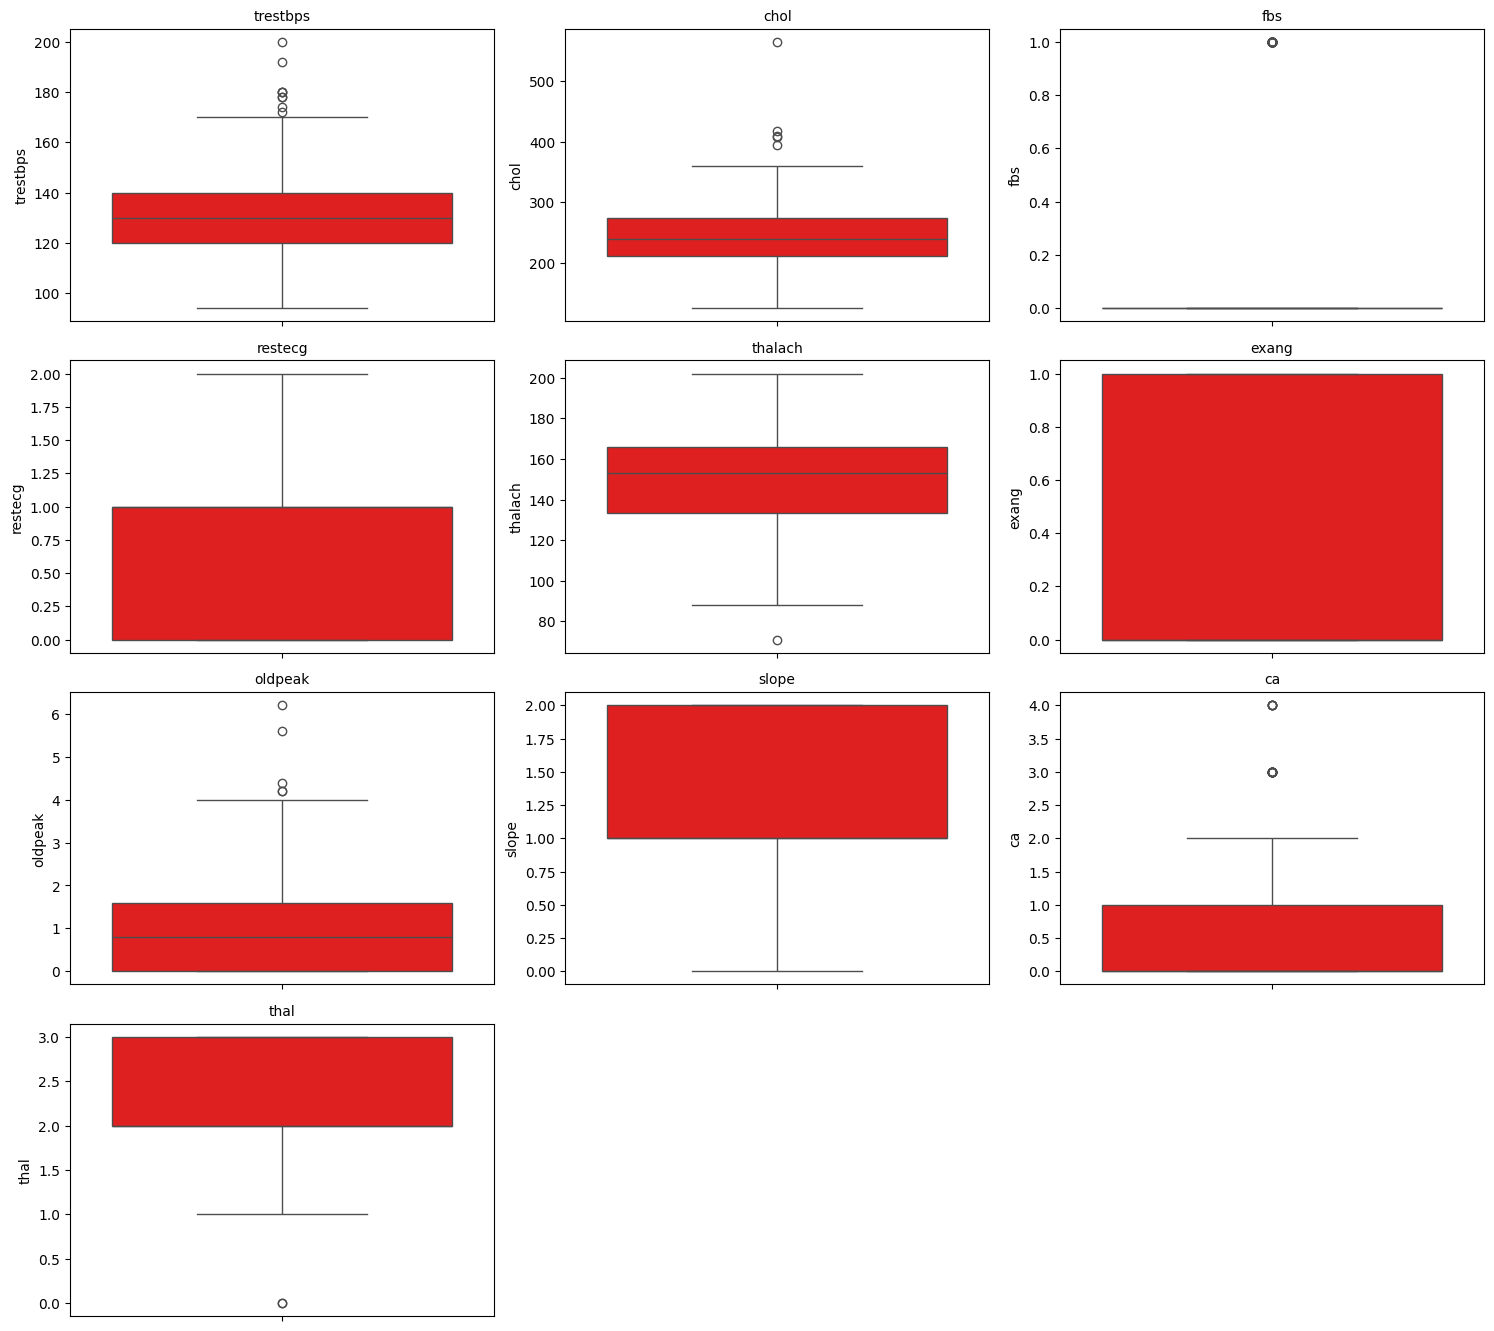

In [15]:
features = ['trestbps', 'chol', 'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope', 'ca', 'thal']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[feature], color="red")
    plt.title(feature, fontsize=10)

plt.tight_layout()
plt.show()

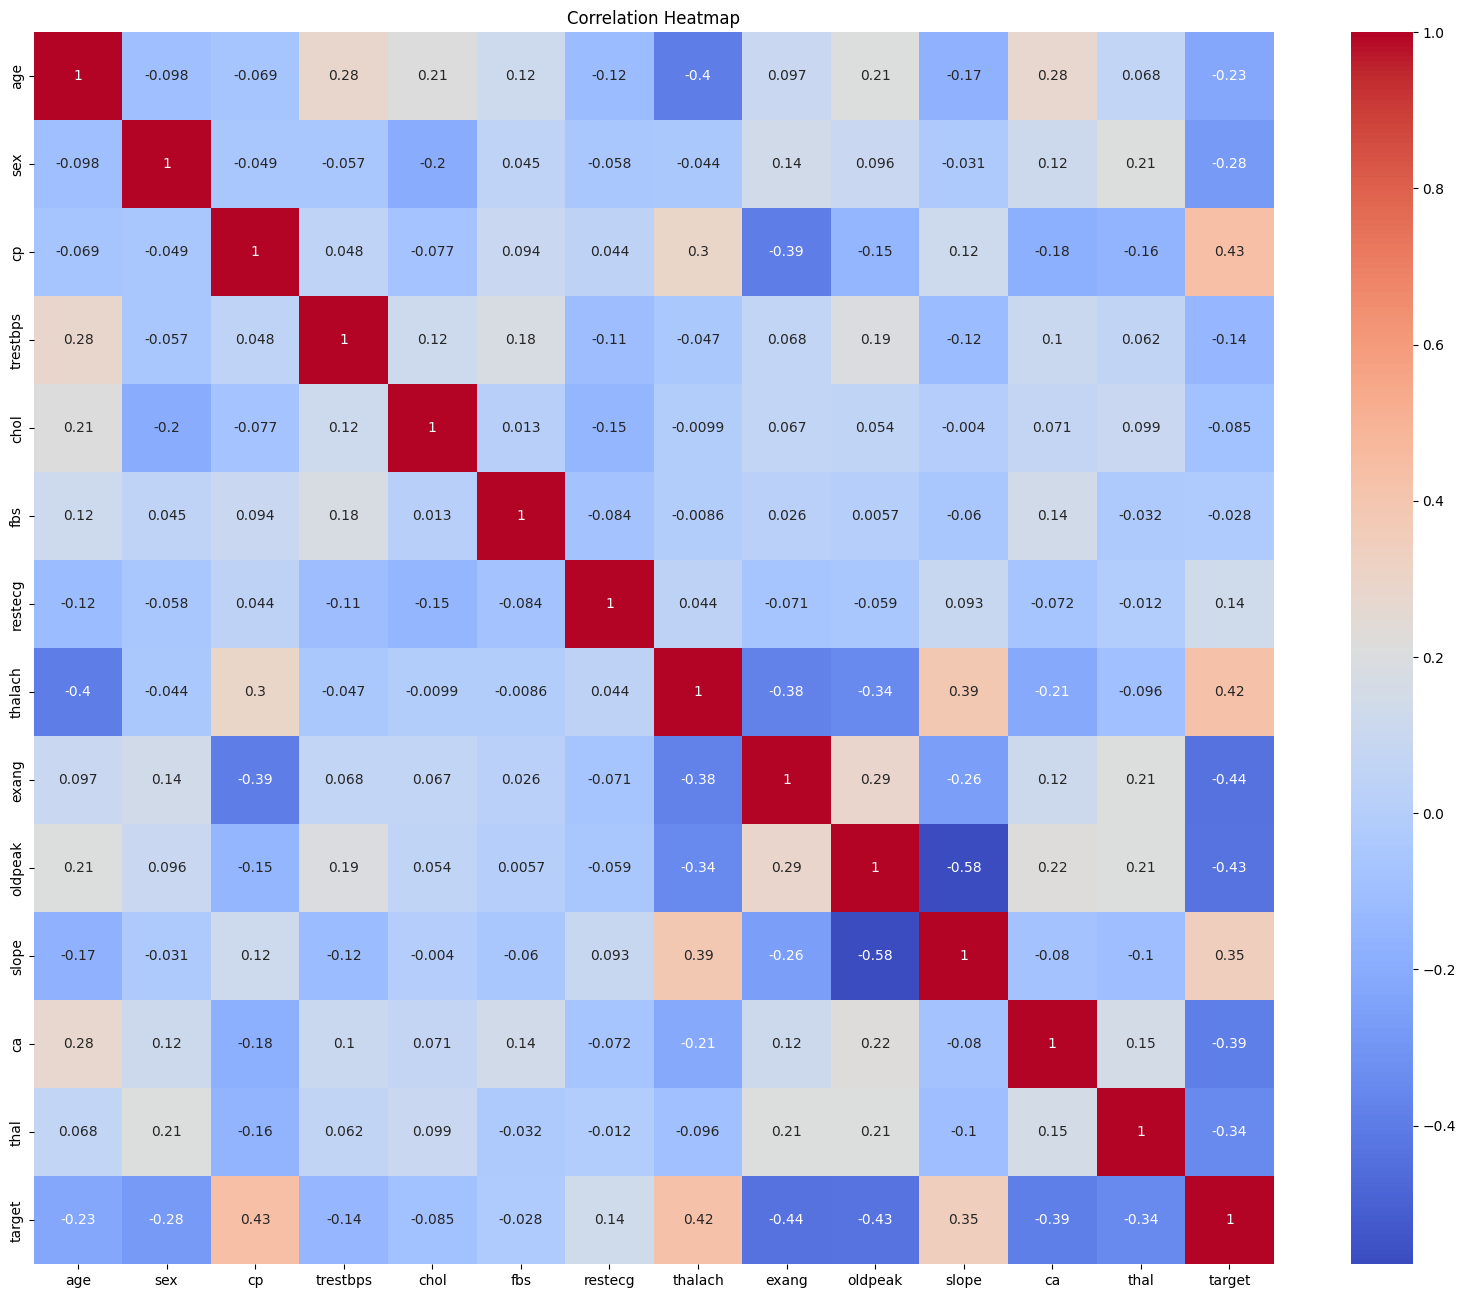

In [16]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#**Cleaning Data**

In [17]:
print(df.duplicated().sum())
df = df.drop_duplicates()

1


In [18]:
# Replacing the outliers Function

def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [19]:
outlier_columns = ['trestbps', 'chol', 'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope', 'ca', 'thal']

for col in outlier_columns:
    df = clip_outliers(df, col)

In [20]:
df.round().astype(int)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,4,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,1,2,0,2,1
4,57,0,0,120,354,0,1,163,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,1,0,3,0
300,68,1,0,144,193,0,1,141,0,3,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,1,3,0


#**Visualize After Cleaning**

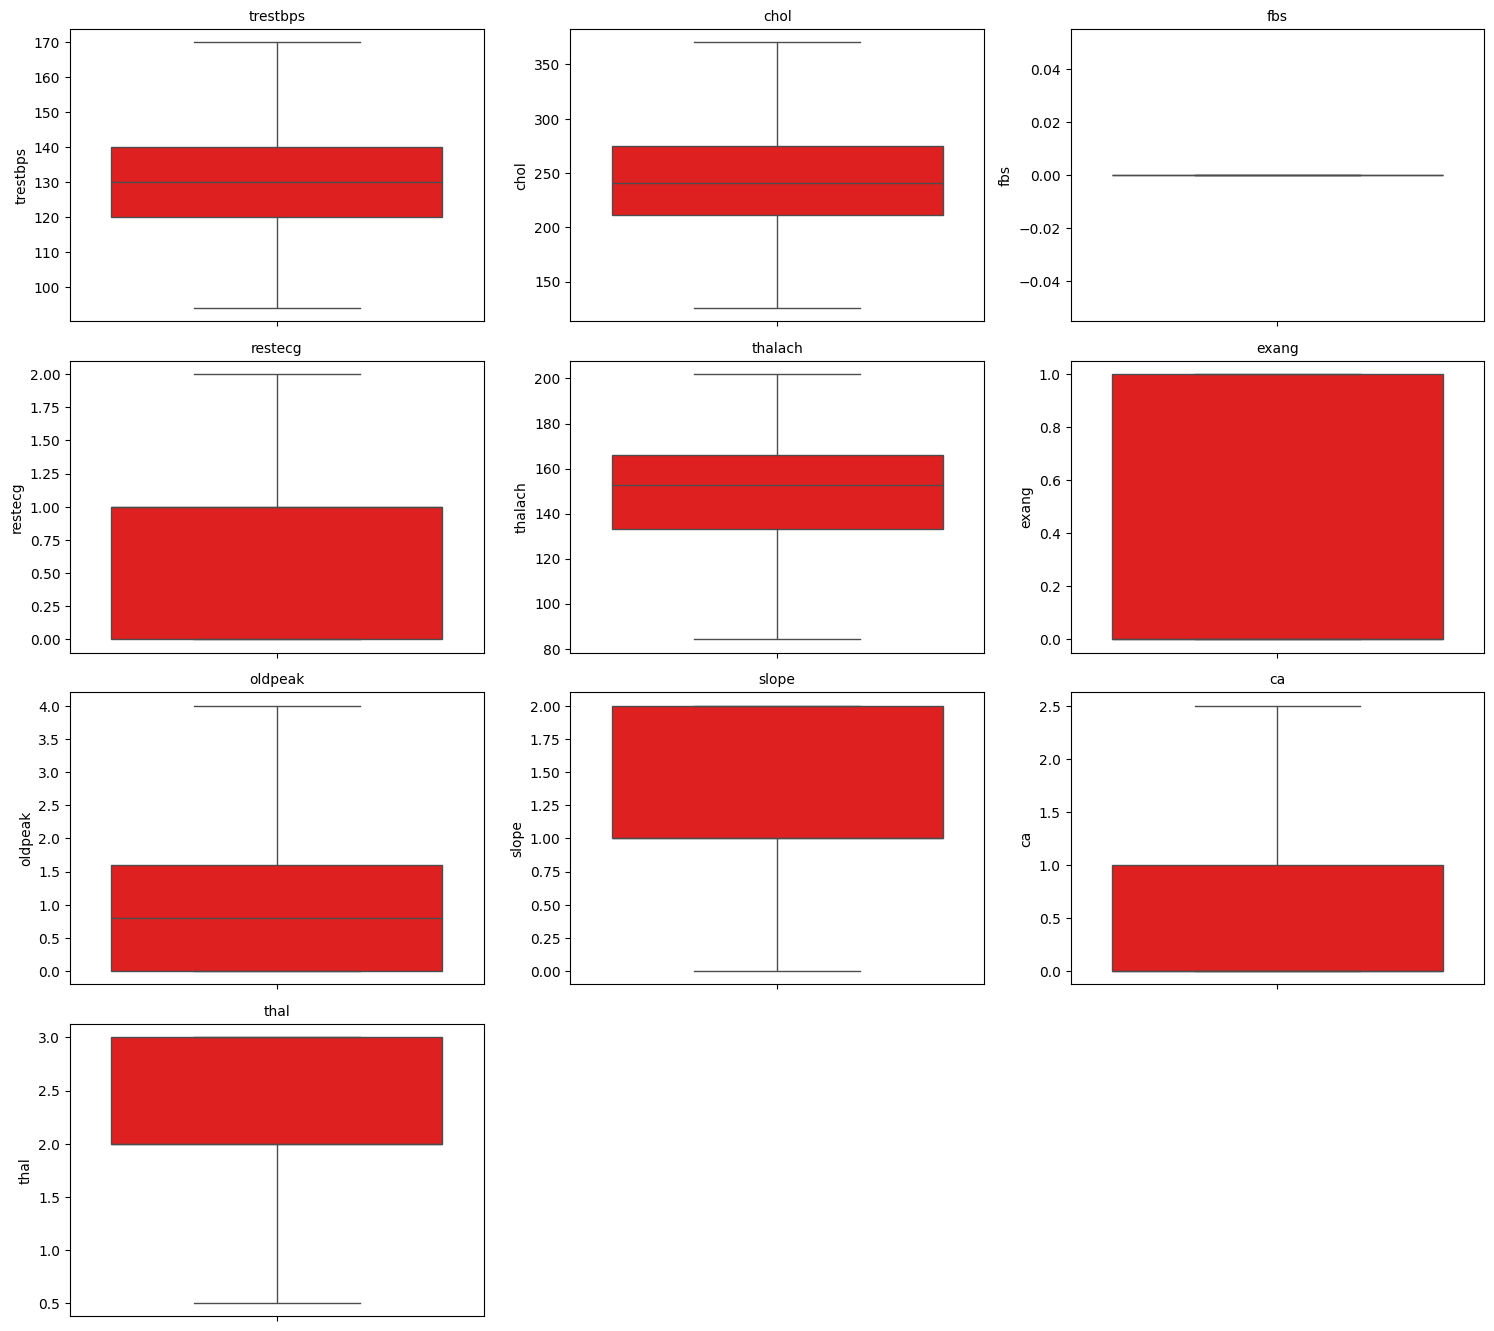

In [21]:
features = ['trestbps', 'chol', 'fbs',	'restecg', 'thalach',	'exang', 'oldpeak',	'slope', 'ca', 'thal']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[feature], color="red")
    plt.title(feature, fontsize=10)

plt.tight_layout()
plt.show()

#**Spliting Data**

In [22]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Logistic Regression**

In [23]:
logistic_model = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced")
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# testing the model
print("=== Logistic Regression ===")
print("Train Accuracy:", accuracy_score(y_train, logistic_model.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Logistic Regression ===
Train Accuracy: 0.8630705394190872
Test Accuracy : 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



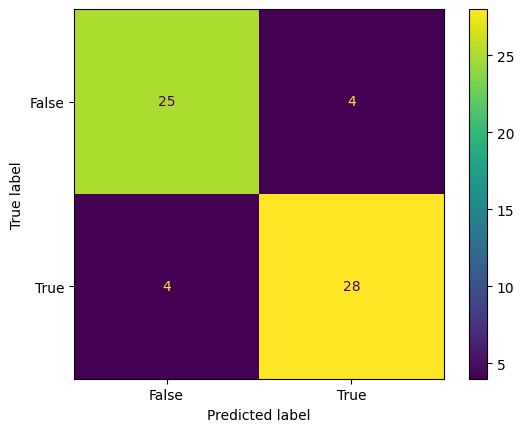

In [24]:
# Confusion matrix of Results from Logistic Regression
cm = metrics.confusion_matrix(y_test, logistic_model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [25]:
# Checking the performance of the model
y_pred_svc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred })
y_pred_svc_df.head(10)

,Expected,Predicted
180,0,0
229,0,0
111,1,1
247,0,0
60,1,1
9,1,1
119,1,1
224,0,0
268,0,0
33,1,0


In [26]:
joblib.dump(logistic_model, "logistic_model.pkl")

['logistic_model.pkl']

#**Random Forest**

In [27]:
random_forest_model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42, class_weight="balanced")
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

# testing the model
print("=== Random Forest ===")
print("Train Accuracy:", accuracy_score(y_train, random_forest_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Random Forest ===
Train Accuracy: 0.979253112033195
Test Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



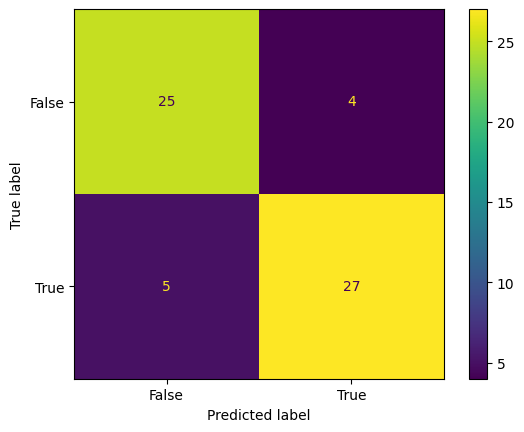

In [28]:
# Confusion matrix of Results from Random Forest
cm = metrics.confusion_matrix(y_test, random_forest_model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [29]:
# Checking the performance of the model
y_pred_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred })
y_pred_df.head(10)

,Expected,Predicted
180,0,0
229,0,0
111,1,0
247,0,0
60,1,1
9,1,1
119,1,1
224,0,0
268,0,0
33,1,1


In [30]:
joblib.dump(random_forest_model, "random_forest_model.pkl")

['random_forest_model.pkl']

#**Downloading Models**

In [31]:
files.download("logistic_model.pkl")
files.download("random_forest_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>